In [12]:
import pandas as pd

from sklearn import model_selection, tree

from IPython.display import SVG, display
from graphviz import Source

In [3]:
train_df = pd.read_csv('titanic_train.csv')

train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
# preprocessing

X = train_df.drop(labels=['PassengerId', 'Survived', 'Name', 'Cabin'], axis=1)
X = pd.get_dummies(X)

X.Age = X.Age.median()

y = train_df.Survived

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y,
    test_size=.33,
    random_state=42
)

In [20]:
clf = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_depth=3,
    min_samples_split=100,
    min_samples_leaf=10
)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=10,
                       min_samples_split=100)

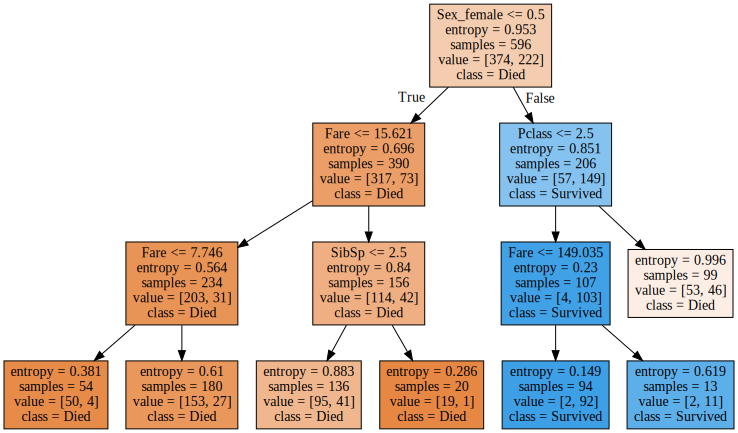

In [21]:
graph = Source(
    tree.export_graphviz(
        clf,
        out_file=None,
        feature_names=list(X),
        class_names=['Died', 'Survived'],
        filled=True
    )
)

display(SVG(graph.pipe(format='svg')))

## Сопоставьте значения из двух списков

* **min_impurity_decrease** - Минимальное снижение "нечистоты" (смешения классов) узла при разделении, чтобы разделение произошло
* **min_samples_split** - Минимальное число образцов в узле, чтобы его можно было разделить на 2
* **min_samples_leaf** - Минимальное число образцов в листьях (при получившемся значении ниже разделение не будет произведено)
* **max_depth** - Максимальное число уровней дерева (максимальная длина пути от корня до листа)

## Выберите все подходящие ответы из списка

Чем больше значение min_samples_split, тем меньше тенденция к переобучению

Малая глубина дерева препятствует переобучению

## Выберите все подходящие ответы из списка
Ни GridSearchCV, ни RandomizedSearchCV не гарантируют получение самой лучшей модели из возможных

GridSearchCV находит наилучшее значение параметров модели из возникающих в результате комбинации переданных параметров

RandomizedSearchCV работает быстрее GridSearchCV так как перебирает не все из возможных комбинаций параметров